# Stock Price Prediction using Linear Regression
## Danial Amin
#### Data Scientist | Aerospace Engineer

Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 


#### Importing Libraries
First step is loading all the required libraries in the notebook.

In [10]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#### Data Preparation
In order to have a dataset prepared for the analysis, it is efficient to write a function which would perform the actions of data preparation on the dataset.

In [3]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last n rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array by scaling
    X_lately = X[-forecast_out:] #creating the column to verify
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation
    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

#### Data Ingestion
Download the historical data for the selected symbol and ingest its path here.

In [28]:
df = pd.read_csv("C:\\Users\\Danial Amin\\Downloads\\IXIC.csv")
forecast_col = 'Close' #name of the column for the data analysis
forecast_out = 100 #How many values should it predict
test_size = 0.2 #Size of test data set for cross validation

#### Model Implimentation
Now the data is converted into training and testing data and the machine learning model is implemented.

In [29]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

0.9806681276991362
[15213.25925538 15247.50622703 15117.26354139 15043.85792381
 14759.59936541 14704.09923988 14758.88208497 14888.61439731
 14507.91553786 14494.409227   14105.70250048 14207.08736948
 14538.46893724 14483.13115476 14401.19562639 14396.95878935
 14653.3802777  14583.02734817 14789.66361364 14785.31748672
 14873.14193123 14871.27339327 14884.81153626 14871.49091258
 14893.05814259 14738.9658736  14956.25099752 15029.29797488
 15076.22574643 15061.92681936 15179.90251939 15233.24019253
 15347.02149762 15236.97832889 15200.92648462 15333.12471441
 15190.82195141 15311.53626335 15432.99862631 15453.05702122
 15559.5148482  15549.38803239 15701.63298665 15731.86063838
 15705.37112192 15725.39556271 15852.46566044 15878.8787796
 15880.42156991 15766.03227317 15920.47151194 15954.50202473
 15894.10189643 15858.57209589 15747.94109612 15622.02331526
 15456.58824934 15699.86206705 15844.4471834  15901.65244229
 16067.22969175 16071.27129317 15875.55445971 15986.3806962
 16003.

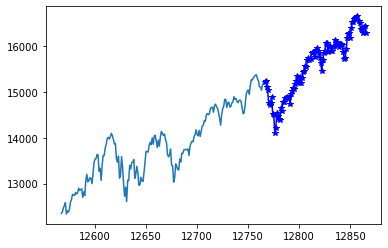

In [31]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
print(score)
print(forecast)
fig, ax = plt.subplots()
ax.plot(df["Close"][-200:-1])
ax.plot(np.transpose([range(len(df)-1,len(df)+forecast_out-1)]),forecast,'-*b')